In [1]:
from spider_net.net import *
from spider_net.trainers import *
from spider_net.data_loaders import *
from spider_net.helpers import *
import numpy as np
import pandas as pd
import time 


%load_ext autoreload
%autoreload 2

In [2]:
hypers = {
    'gpu_space':19,
    'dataset':{'name':'CIFAR10', 'classes':10},
    'batch_size':64,
    'scale':64,
    'reductions':2,
    'chains':1,
    'lr_schedule': {'lr_max': .01, 'T': 4},
    'drop_prob':.2,
    'prune_interval':4,
    'n_mutations':3,
    'device':'cuda'
}

data, hypers['input_dim'] = load_data(hypers['batch_size'], hypers['dataset']['name'])

# Pre

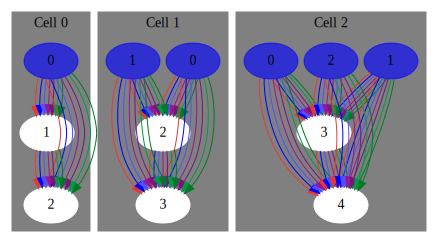

In [3]:
hypers['mut_metric'] = {'metric':'std_weight', 'sort_dir':min}
hypers['mutate'] = True
model = Net(hypers)
model.data = data
g = model.plot_network(color_by='op')
g.render("multi_input_initial")
model.plot_network(color_by='op')

In [ ]:
n_cycles = 20
start_t = time.time()
for n in range(n_cycles):
    print("="*40,"Cycle {}".format(n),"="*40)
    full_train(model, hypers)
    print(model)
    model.reset_parameters()
print("Total Search Time:",show_time(time.time()-start_t))

======================================== Cycle 0 ========================================
=== Training Assam Justinian Curran ===
Starting at 2021-12-21 15:33:18.144971
12/21/2021 03:33 PM


In [ ]:
model.plot_network(color_by='op')

In [ ]:
hypers['lr_schedule']['T'] = 600
hypers['mutate'] = False
model.reset_parameters()
preds, targets, meta = full_train(model, hypers)

=== Training Betsey Elsie Bujumbura ===
Starting at 2021-12-23 13:46:24.881520
12/23/2021 01:46 PM


In [ ]:
model.plot_network(color_by='op')

# Random

In [4]:
import numpy as np

dhs = np.array([  -4,   -2,   -5,   -4,   -7,  -13,  -10,  -11,  -14,  -13,  -15,
        -17,  -16,  -24,  -26,  -22, -153])

In [5]:
for dh in dhs:
    model.mutate(3, True)
    ops = []
    for cell in model.cells:
        for k, edge in cell.edges.items():
            for op in edge.ops:
                if not op.zero:
                    ops.append(op)
    dh_idxs = np.random.choice(np.arange(len(ops)), -dh)
    dh = [ops[idx].deadhead(4, force=True) for idx in dh_idxs]
    print(dh)
    clean("Deadhead", verbose=False)
    model.clear_deadends()

clean("Deadhead", verbose=True)
g = model.plot_network(color_by='op')

False 3.517578125 0.19401969909667968 3.7115978240966796
Mutating 2 2->3
False 3.728515625 0.76279296875 4.49130859375
Mutating 0 0->2
False 4.4296875 0.3821762084960938 4.811863708496094
Mutating 1 0->2
[1, 1, 1, 1]
False 4.6953125 0.19401969909667968 4.88933219909668
Mutating 2 0->5
False 4.935546875 1.144189453125 6.079736328125
Mutating 0 2->3
False 5.658203125 0.3821762084960938 6.040379333496094
Mutating 1 1->4
[1, 1]
False 5.94921875 0.3821762084960938 6.331394958496094
Mutating 1 1->4
False 6.302734375 0.19401969909667968 6.49675407409668
Mutating 2 1->4
False 6.5390625 0.76279296875 7.30185546875
Mutating 0 0->1
[1, 1, 1, 1, 1]
False 7.09375 1.144189453125 8.237939453125
Mutating 0 3->4
False 7.802734375 0.2910295486450195 8.09376392364502
Mutating 2 4->5
False 8.0390625 0.3821762084960938 8.421238708496094
Mutating 1 1->6
[1, 1, 1, 1]
False 8.166015625 1.144189453125 9.310205078125
Mutating 0 4->5
False 8.87109375 0.2910295486450195 9.16212329864502
Mutating 2 4->5
False 9.10

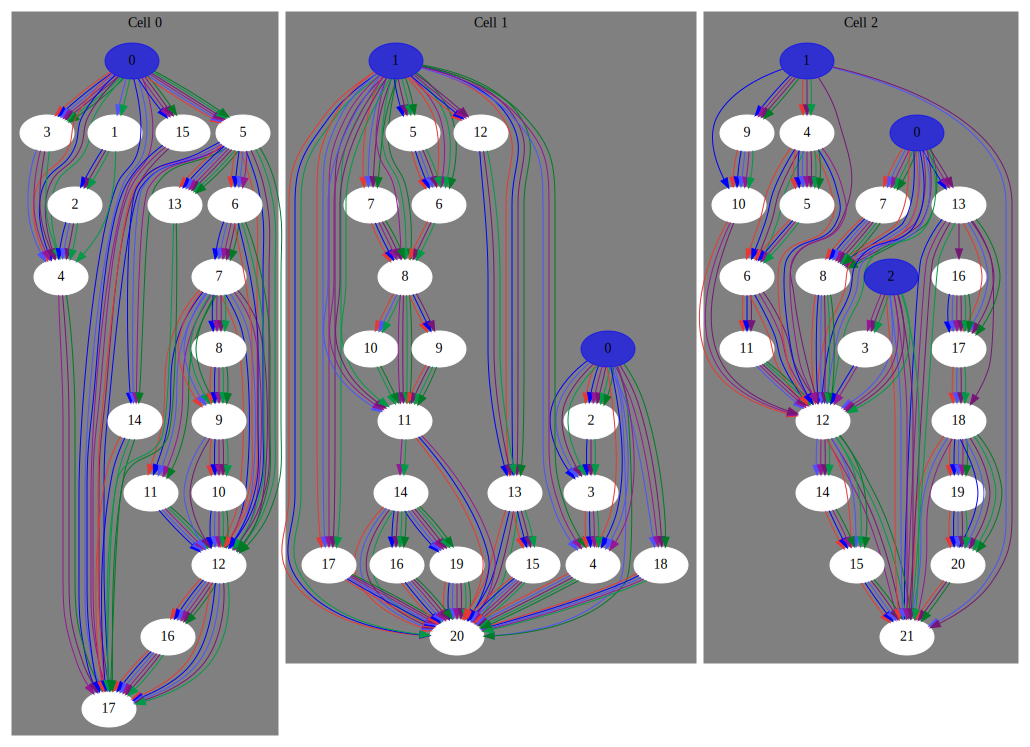

In [6]:
g.render("random-2-no-bottleneck")
g

In [6]:
print(model)

=========================== NETWORK ===========================
================== Hippocratic Caputo Kelvin ==================
Epoch 0              :     Dim      :    Params    :   Ops:   
Initializer          :              :    1,856     :          
Cell 0               :   64 x 32    :   608,846    :    238   
 ↳ Aux Tower         :              :     650      :          
Cell 1               :  128 x 16    :  1,988,866   :    259   
 ↳ Aux Tower         :              :    1,290     :          
Cell 2               :  256 x 8     :  10,578,328  :    266   
 ↳ Classifier        :              :    2,570     :          
Total                :              :  13,182,406  :          



In [ ]:
full_train(model, hypers);

=== Training McGraw Madame Sextans ===
Starting at 2021-12-21 15:52:05.144959
12/21/2021 03:52 PM


In [7]:
hypers['lr_schedule']['T'] = 600
hypers['mutate'] = False
hypers['prune'] = False
model.reset_parameters()
preds, targets, meta = full_train(model, hypers)

=== Training Jensen Finley Ohio ===
Starting at 2021-12-23 14:57:55.186861
12/23/2021 02:57 PM


KeyboardInterrupt: 